In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

In [13]:
# Generate a simple dataset (Moons dataset)
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='rbf', probability=True),
    "Decision Tree": DecisionTreeClassifier(max_depth=4),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=4),
    "Naïve Bayes": GaussianNB()
}

# Function to plot decision boundary
def plot_decision_boundary(model, X_train, y_train, title):
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    model.fit(X_train, y_train)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])
    
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=['red', 'blue'], edgecolor='k')
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

-------------------------------------------------------------------------------------

1️⃣ k-Nearest Neighbors (k-NN)

🔹 How it classifies:

Looks at the k closest training points to a new data point.
Assigns the most common class among those neighbors.
Works well for small datasets but becomes slow for large datasets.

🔹 How the decision boundary forms:

Very flexible and adapts to the data.
Decision boundary is usually irregular because it depends on the distribution of points.
Sensitive to noise and outliers.

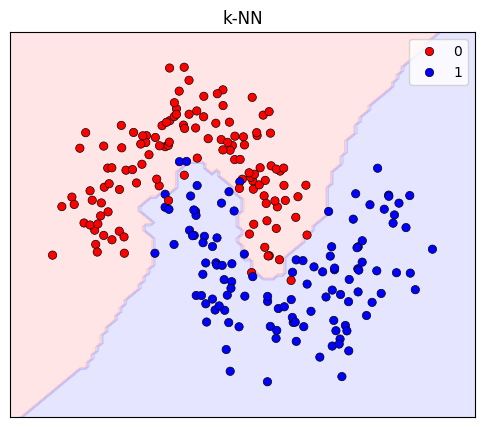

In [14]:
plot_decision_boundary(models["k-NN"], X_train, y_train, "k-NN")

-------------------------------------------------------------------------------------

2️⃣ Logistic Regression

🔹 How it classifies:

Computes a weighted sum of input features and applies a sigmoid function to get probabilities.
If probability > 0.5, it assigns one class; otherwise, the other.
Best for linearly separable data.

🔹 How the decision boundary forms:

Always a straight line (or a hyperplane in higher dimensions).
Cannot handle complex decision boundaries.

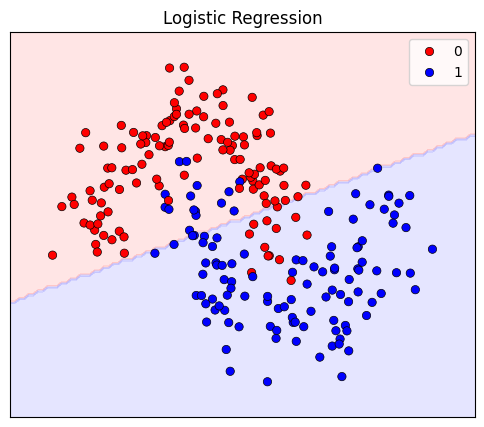

In [15]:
plot_decision_boundary(models["Logistic Regression"], X_train, y_train, "Logistic Regression")

-------------------------------------------------------------------------------------

3️⃣ Support Vector Machine (SVM)

🔹 How it classifies:

Finds the optimal hyperplane that best separates the classes.
Maximizes the margin between the closest points (support vectors).
Can use kernel tricks (like Radial Basis Function (RBF)) to handle non-linear data.

🔹 How the decision boundary forms:

If using a linear kernel, the boundary is straight.
With RBF kernel, it adapts to complex shapes.
Very effective with well-separated classes.


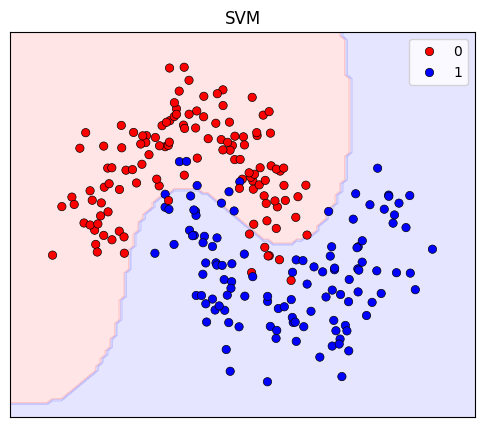

In [16]:
plot_decision_boundary(models["SVM"], X_train, y_train, "SVM")

-------------------------------------------------------------------------------------

4️⃣ Decision Tree

🔹 How it classifies:

Splits data into branches based on feature values.
Each split aims to increase purity (i.e., make each group more homogenous).
Works well with both numerical and categorical data.

🔹 How the decision boundary forms:

Boundaries are axis-aligned, meaning they form rectangular regions.
Can overfit if the tree is too deep.
Easy to interpret but sensitive to small changes in data.

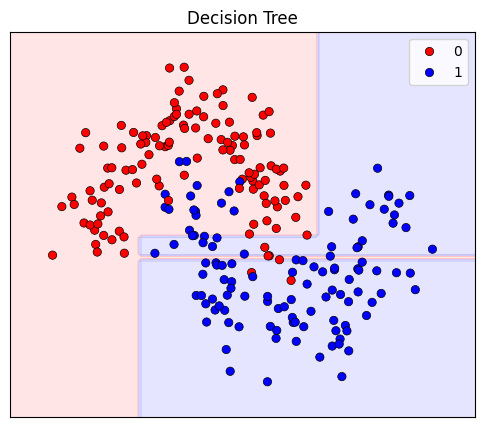

In [17]:
plot_decision_boundary(models["Decision Tree"], X_train, y_train, "Decision Tree")

---

5️⃣ Random Forest

🔹 How it classifies:

Uses multiple decision trees and combines their results.
Each tree gets a random subset of the data.
Final prediction is made by averaging (regression) or voting (classification).

🔹 How the decision boundary forms:

Looks like multiple decision trees combined, so the boundary is less jagged than a single tree.
Reduces overfitting compared to a single decision tree.
Works well on complex datasets.

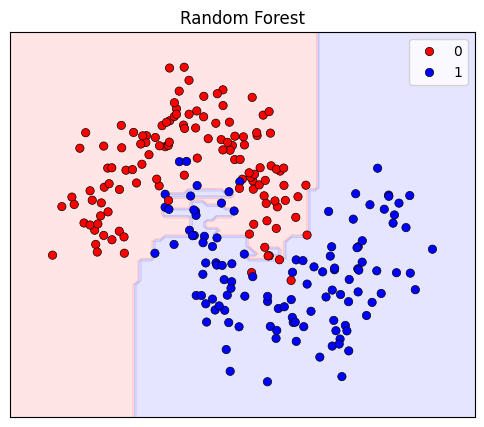

In [18]:
plot_decision_boundary(models["Random Forest"], X_train, y_train, "Random Forest")

---

6️⃣ Naïve Bayes

🔹 How it classifies:

Uses Bayes' Theorem to calculate the probability of a class given the input features.
Assumes that features are independent (which is often not true).
Works very well for text classification (spam detection, sentiment analysis).

🔹 How the decision boundary forms:

The boundary is usually simple and smooth.
Works well with high-dimensional data.
Can be too simple for complex datasets.

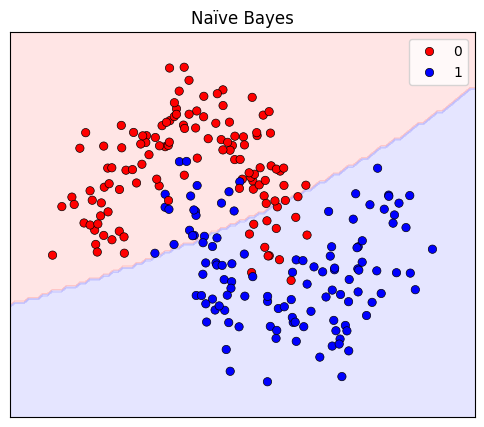

In [19]:
plot_decision_boundary(models["Naïve Bayes"], X_train, y_train, "Naïve Bayes")

---
💡 Summary:

🔹 k-NN: Classifies based on nearby points, leading to irregular decision boundaries.

🔹 Logistic Regression: Creates a straight-line boundary using probabilities.

🔹 SVM: Finds an optimal boundary, can be linear or non-linear (with kernels).

🔹 Decision Tree: Creates axis-aligned splits, forming rectangular regions.

🔹 Random Forest: Averages multiple decision trees, reducing overfitting.

🔹 Naïve Bayes: Uses probability, assuming feature independence, leading to smooth boundaries.